In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# %config InlineBackend.figure_format = 'retina'

sns.set()

In [ ]:
df = pd.read_csv("hr_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   names                  15000 non-null  object 
 1   satisfaction_level     15000 non-null  float64
 2   last_evaluation        15000 non-null  float64
 3   number_project         15000 non-null  int64  
 4   average_monthly_hours  15000 non-null  int64  
 5   exp_in_company         15000 non-null  int64  
 6   work_accident          15000 non-null  int64  
 7   left                   15000 non-null  int64  
 8   promotion_last_5years  15000 non-null  int64  
 9   role                   15000 non-null  object 
 10  salary                 15000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


There are 11 columns, 3 features are not numeric values

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.612847,0.716115,3.803133,201.052400,3.498333,0.144600,0.238133,0.021267
std,0.248628,0.171171,1.232590,49.942074,1.460139,0.351709,0.425955,0.144277
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Based on the descriptive analytics / statistical summary, there is no null value for numeric all the features. <br> For statisfaction level, on average, it is 0.64 (about the same with the mean). <br> For number of project, on average, it is 4 project per staff (about the same with the mean). <br> For average monthly hours, it is 200 (8 hours a day, about the same with the mean). <br> For the year of experience of staff in the company, on average it is 3 years, and it can consider as a new company as 75% of the staff is with 4 years of experience and 25% of the staff with 10 years of experience. <br>Next, have a look on the dataset.

In [ ]:
df.head()

,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role,salary
0,Jessica Stroud,0.38,0.53,2,157,3,0,1,0,sales,low
1,Daryl Fields,0.80,0.86,5,262,6,0,1,0,sales,medium
2,Daisy Anderson,0.11,0.88,7,272,4,0,1,0,sales,medium
3,Joseph Fernandez,0.72,0.87,5,223,5,0,1,0,sales,low
4,Herbert Moore,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
corr = df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105077,-0.142908,-0.020013,-0.100803,0.058673,-0.388225,0.025596
last_evaluation,0.105077,1.000000,0.349380,0.339770,0.131658,-0.007135,0.006701,-0.008695
number_project,-0.142908,0.349380,1.000000,0.417232,0.196839,-0.004767,0.023900,-0.006073
average_monthly_hours,-0.020013,0.339770,0.417232,1.000000,0.127791,-0.010160,0.071353,-0.003550
exp_in_company,-0.100803,0.131658,0.196839,0.127791,1.000000,0.002092,0.144924,0.067420
work_accident,0.058673,-0.007135,-0.004767,-0.010160,0.002092,1.000000,-0.154653,0.039249
left,-0.388225,0.006701,0.023900,0.071353,0.144924,-0.154653,1.000000,-0.061799
promotion_last_5years,0.025596,-0.008695,-0.006073,-0.003550,0.067420,0.039249,-0.061799,1.000000


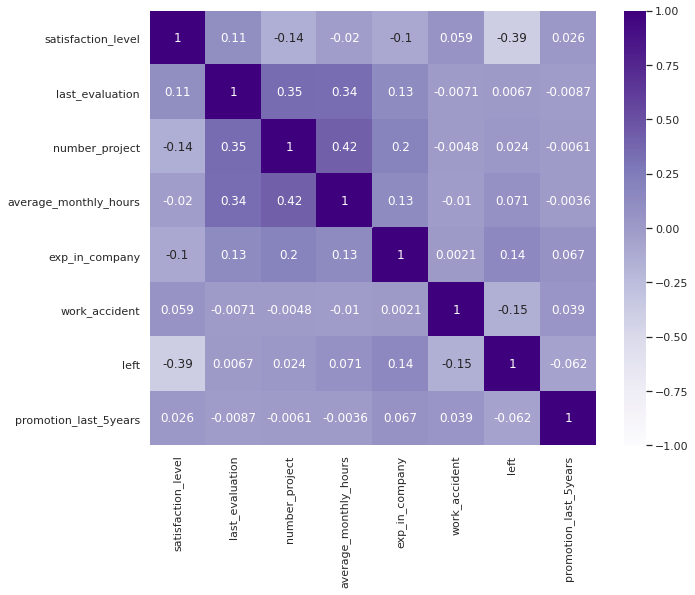

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr, cmap='Purples', annot=True, vmin = -1, vmax = 1, center = 0)
plt.savefig('HRC_Corr.png')

<function matplotlib.pyplot.show>

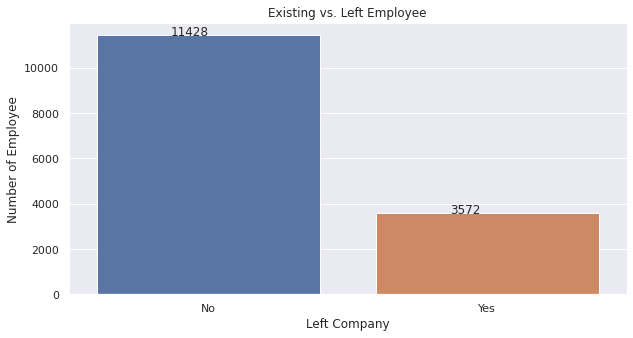

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(x='left', data=df)
plt.title('Existing vs. Left Employee')
plt.ylabel('Number of Employee')
plt.xlabel('Left Company')
plt.xticks([0,1],['No','Yes'])

total = len(df)
for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+10
        ax.annotate(value, (x, y))
plt.savefig('TotalEmp.png')
plt.show

Based on the graphs, the dataset is with 15000 employees, where 11428 are existing employees and 3572 employees have left company.

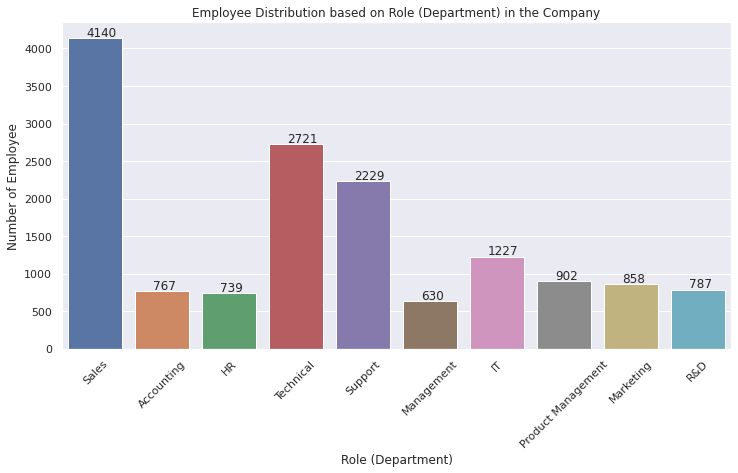

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='role', data=df)

plt.xlabel('Role (Department)')
plt.ylabel('Number of Employee')
plt.title('Employee Distribution based on Role (Department) in the Company')
labels = ['Sales','Accounting','HR','Technical','Support','Management','IT','Product Management','Marketing','R&D']
ax.set_xticklabels(labels, rotation=45)

total = len(df)
for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+25
        ax.annotate(value, (x, y))
plt.savefig('EmpDistribution.png')
plt.show()

Based on the graph, There are 10 departments in the company. Sales department is with the highest number of employee (4140) and followed by Technical (2721) and Support (2229). 

<function matplotlib.pyplot.show>

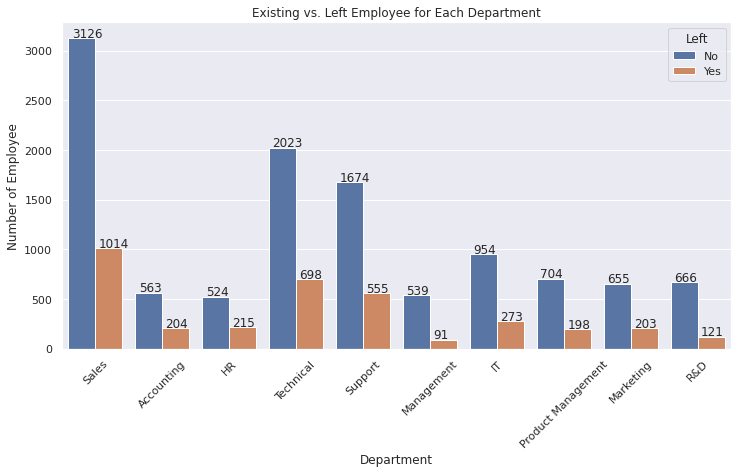

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='role', data=df, hue='left')
plt.ylabel('Number of Employee')
plt.title('Existing vs. Left Employee for Each Department')
plt.xlabel('Department')
plt.legend(title = 'Left', labels = ['No','Yes'])
labels = ['Sales','Accounting','HR','Technical','Support','Management','IT','Product Management','Marketing','R&D']
ax.set_xticklabels(labels, rotation=45)

for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /8
        y = p.get_y() + p.get_height()+10
        ax.annotate(value, (x, y))
plt.savefig('Exist_vs_Left_Dept.png')
plt.show

Based on the graph, Sales department is with the highest number of employee left (1014), followed by Technical (698) and Support (555) departments.
The department with the lowest number of employee left is Management department (91). <br> Hence, the **role** feature maybe one of the elements that will determine if an employee will leave the company.


<function matplotlib.pyplot.show>

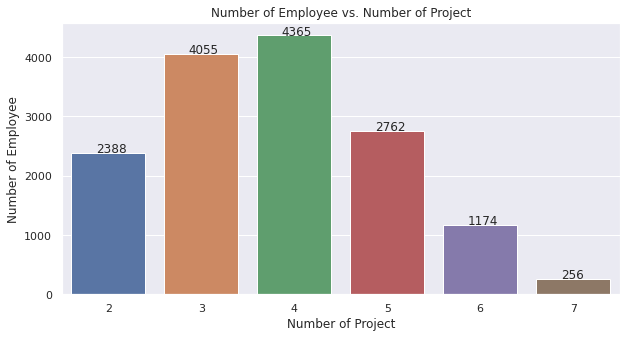

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(x='number_project', data=df)
plt.xlabel('Number of Project')
plt.ylabel('Number of Employee')
plt.title('Number of Employee vs. Number of Project')

for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+10
        ax.annotate(value, (x, y))

plt.show

Based on the finding, most of the employees are with 4 projects per month (4365) and followed by 3 (4055) and 5 projects (2762). The number of employee with 7 projects per month is the lowest, which is 256. This make sense as not all the staff can handle so many projects. 

<function matplotlib.pyplot.show>

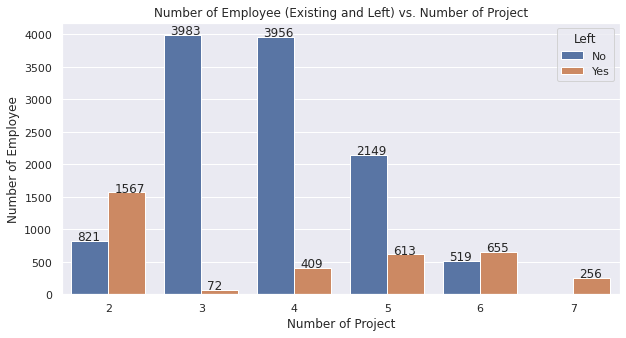

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
import math
ax=sns.countplot(x='number_project', data=df, hue='left')
plt.xlabel('Number of Project')
plt.ylabel('Number of Employee')
plt.title('Number of Employee (Existing and Left) vs. Number of Project')
plt.legend(title = 'Left', labels = ['No','Yes'], loc = 'upper right')

for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        value = float(value)
        if(math.isnan(value)):
          value = 0
        else:          
          value = int(value)
          value = str(value)
        x = p.get_x() + p.get_width() /6
        y = p.get_y() + p.get_height()+10
        ax.annotate(value, (x, y))        
plt.savefig('Emp_vs_proj.png')
plt.show

**For Left Employee** <br>
Based on the graph, the employee with 2 projects were with the highest number of employee left, (1567 employees), followed by 6 (655 employees) and 5 (613 employees) projects. <br> Also, it can be seen that employees tend to leave if the number of projects increased (from 3 to 6 projects). Suprisingly, all the employees with 7 projects have all left the company. Besides, it is found that employees with 2 project are tend to leave the company as they may feel that their talents are not utilized. <br> <br>

**For Existing Employee** <br>
Based on the graph, employees with 3 and 4 projects are with the highest number of employees (3983 and 3956, respectively). This is followed by employees with 5, 2 and 6 projects. This can conclude that employees are assigned with 3-4 projects and they are comfortable with the assignment. <br> <br> 

In general, employees are comfortable with 3 or 4 projects. <br> Hence, number of project may also determine if an employee will leave the company

<function matplotlib.pyplot.show>

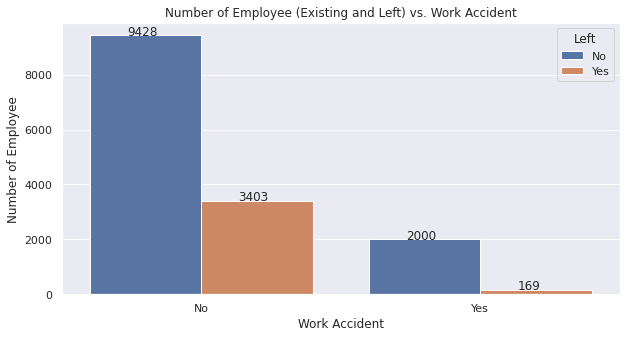

In [ ]:
ax = sns.countplot(x='work_accident', data=df, hue='left')
plt.xticks([0,1],['No', 'Yes'])
plt.ylabel('Number of Employee')
plt.xlabel('Work Accident')
plt.title('Number of Employee (Existing and Left) vs. Work Accident')
plt.legend(title = 'Left', labels=['No','Yes'])

for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+10
        ax.annotate(value, (x, y))

plt.show

Based on the graph, 12831 employees are without work accident and 2169 employees are with work accident.  Surprisingly, there are only 169 out of 2169 employees who had work accident left the company. <br> <br>



<function matplotlib.pyplot.show>

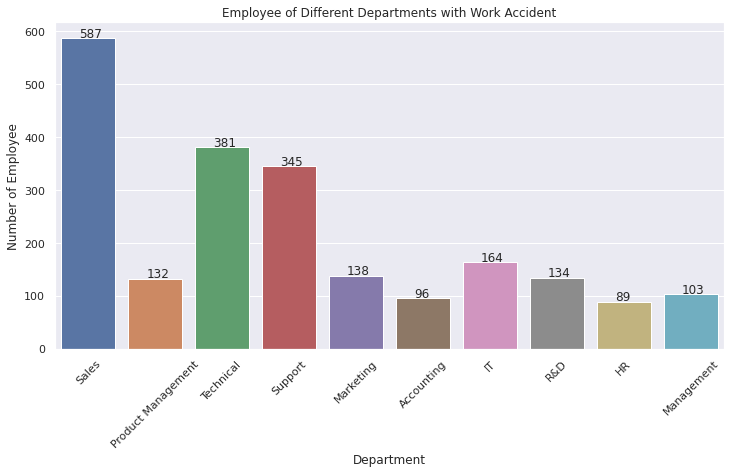

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='role', data=df[df['work_accident']==1])
plt.xlabel('Department')
plt.ylabel('Number of Employee')
plt.title('Employee of Different Departments with Work Accident')
labels = ['Sales','Product Management','Technical','Support','Marketing','Accounting','IT','R&D','HR','Management']
ax.set_xticklabels(labels, rotation=45)

total = len(df[df['work_accident']==1])
for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+2
        ax.annotate(value, (x, y))

plt.show

Based on the graph, the sales department is with the highest number of employee with work accident (587). This is followed by Technical (381) and Support (345) departments.

<function matplotlib.pyplot.show>

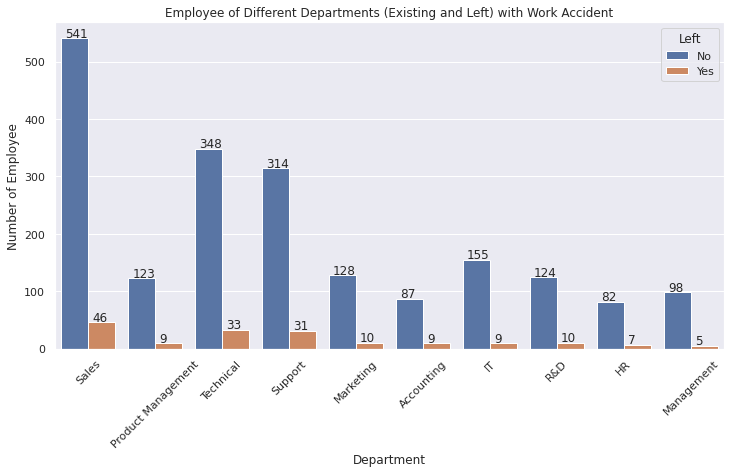

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='role', data=df[df['work_accident']==1], hue='left')
plt.xlabel('Department')
plt.ylabel('Number of Employee')
plt.title('Employee of Different Departments (Existing and Left) with Work Accident')
plt.legend(title='Left', labels=['No','Yes'])
labels = ['Sales','Product Management','Technical','Support','Marketing','Accounting','IT','R&D','HR','Management']
ax.set_xticklabels(labels, rotation=45)
for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /7
        y = p.get_y() + p.get_height()+2
        ax.annotate(value, (x, y))
plt.savefig('Emp_vs_WorkAcc.png')
plt.show

Based on the graph, it is found that the number of employees with work accident left the company is low accross all the departments in the company.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Left Employee')

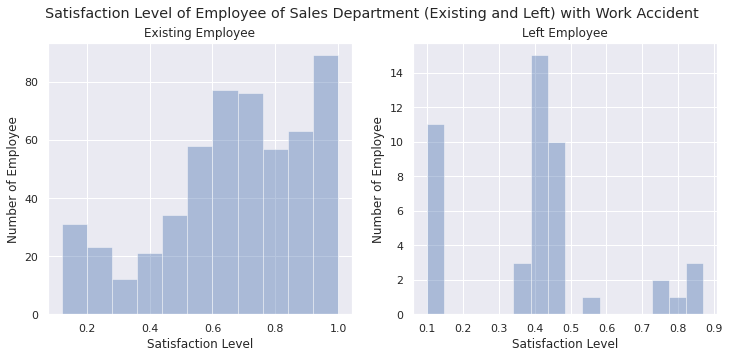

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=False)
plt.suptitle('Satisfaction Level of Employee of Sales Department (Existing and Left) with Work Accident')
df_temp = df[(df['work_accident'] == 1) & (df['left'] == 0) & (df['role'] == 'sales')]['satisfaction_level']

ax1=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[0])
ax1.set_xlabel('Satisfaction Level')
ax1.set_ylabel('Number of Employee')
ax1.set_title('Existing Employee')

df_temp = df[(df['work_accident'] == 1) & (df['left'] == 1) & (df['role'] == 'sales')]['satisfaction_level']
ax2=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[1])
ax2.set_xlabel('Satisfaction Level')
ax2.set_ylabel('Number of Employee')
ax2.set_title('Left Employee')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Left Employee')

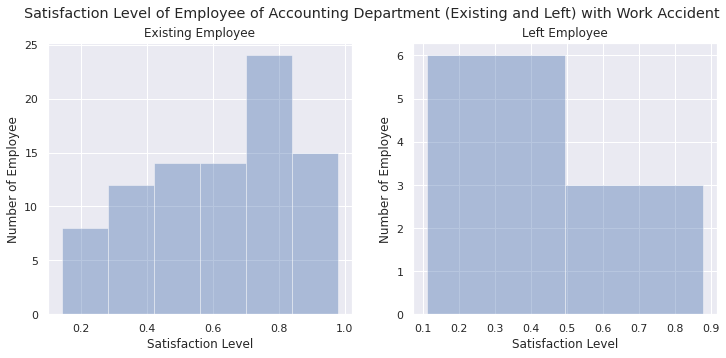

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=False)
plt.suptitle('Satisfaction Level of Employee of Accounting Department (Existing and Left) with Work Accident')
df_temp = df[(df['work_accident'] == 1) & (df['left'] == 0) & (df['role'] == 'accounting')]['satisfaction_level']

ax1=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[0])
ax1.set_xlabel('Satisfaction Level')
ax1.set_ylabel('Number of Employee')
ax1.set_title('Existing Employee')

df_temp = df[(df['work_accident'] == 1) & (df['left'] == 1) & (df['role'] == 'accounting')]['satisfaction_level']
ax2=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[1])
ax2.set_xlabel('Satisfaction Level')
ax2.set_ylabel('Number of Employee')
ax2.set_title('Left Employee')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Left Employee')

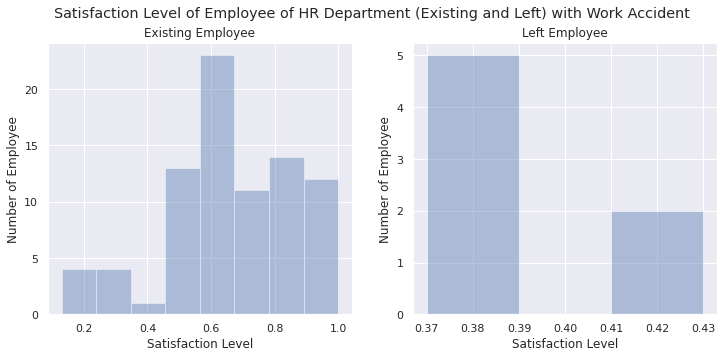

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=False)
plt.suptitle('Satisfaction Level of Employee of HR Department (Existing and Left) with Work Accident')
df_temp = df[(df['work_accident'] == 1) & (df['left'] == 0) & (df['role'] == 'hr')]['satisfaction_level']

ax1=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[0])
ax1.set_xlabel('Satisfaction Level')
ax1.set_ylabel('Number of Employee')
ax1.set_title('Existing Employee')

df_temp = df[(df['work_accident'] == 1) & (df['left'] == 1) & (df['role'] == 'hr')]['satisfaction_level']
ax2=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[1])
ax2.set_xlabel('Satisfaction Level')
ax2.set_ylabel('Number of Employee')
ax2.set_title('Left Employee')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Left Employee')

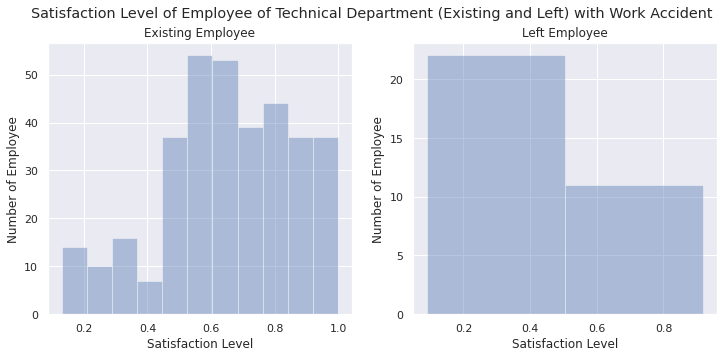

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=False)
plt.suptitle('Satisfaction Level of Employee of Technical Department (Existing and Left) with Work Accident')
df_temp = df[(df['work_accident'] == 1) & (df['left'] == 0) & (df['role'] == 'technical')]['satisfaction_level']

ax1=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[0])
ax1.set_xlabel('Satisfaction Level')
ax1.set_ylabel('Number of Employee')
ax1.set_title('Existing Employee')

df_temp = df[(df['work_accident'] == 1) & (df['left'] == 1) & (df['role'] == 'technical')]['satisfaction_level']
ax2=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[1])
ax2.set_xlabel('Satisfaction Level')
ax2.set_ylabel('Number of Employee')
ax2.set_title('Left Employee')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Left Employee')

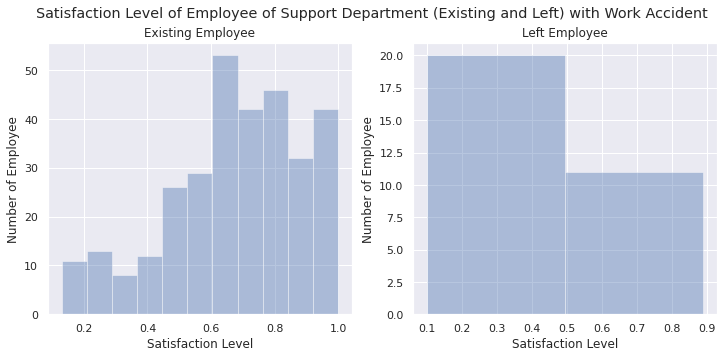

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=False)
plt.suptitle('Satisfaction Level of Employee of Support Department (Existing and Left) with Work Accident')
df_temp = df[(df['work_accident'] == 1) & (df['left'] == 0) & (df['role'] == 'support')]['satisfaction_level']

ax1=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[0])
ax1.set_xlabel('Satisfaction Level')
ax1.set_ylabel('Number of Employee')
ax1.set_title('Existing Employee')

df_temp = df[(df['work_accident'] == 1) & (df['left'] == 1) & (df['role'] == 'support')]['satisfaction_level']
ax2=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[1])
ax2.set_xlabel('Satisfaction Level')
ax2.set_ylabel('Number of Employee')
ax2.set_title('Left Employee')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Left Employee')

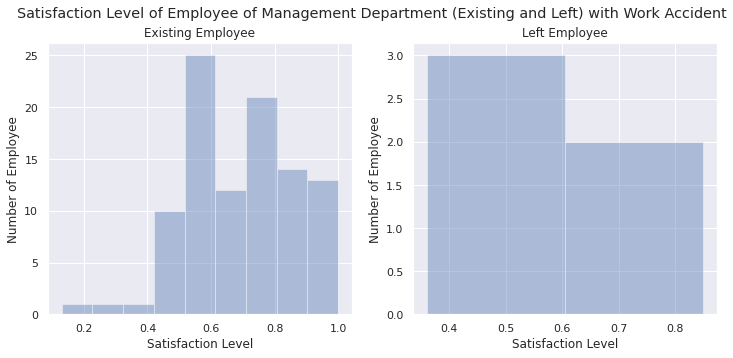

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=False)
plt.suptitle('Satisfaction Level of Employee of Management Department (Existing and Left) with Work Accident')
df_temp = df[(df['work_accident'] == 1) & (df['left'] == 0) & (df['role'] == 'management')]['satisfaction_level']

ax1=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[0])
ax1.set_xlabel('Satisfaction Level')
ax1.set_ylabel('Number of Employee')
ax1.set_title('Existing Employee')

df_temp = df[(df['work_accident'] == 1) & (df['left'] == 1) & (df['role'] == 'management')]['satisfaction_level']
ax2=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[1])
ax2.set_xlabel('Satisfaction Level')
ax2.set_ylabel('Number of Employee')
ax2.set_title('Left Employee')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Left Employee')

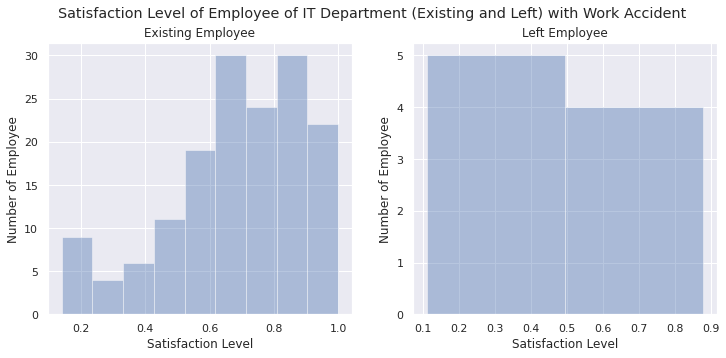

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=False)
plt.suptitle('Satisfaction Level of Employee of IT Department (Existing and Left) with Work Accident')
df_temp = df[(df['work_accident'] == 1) & (df['left'] == 0) & (df['role'] == 'IT')]['satisfaction_level']

ax1=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[0])
ax1.set_xlabel('Satisfaction Level')
ax1.set_ylabel('Number of Employee')
ax1.set_title('Existing Employee')

df_temp = df[(df['work_accident'] == 1) & (df['left'] == 1) & (df['role'] == 'IT')]['satisfaction_level']
ax2=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[1])
ax2.set_xlabel('Satisfaction Level')
ax2.set_ylabel('Number of Employee')
ax2.set_title('Left Employee')  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Left Employee')

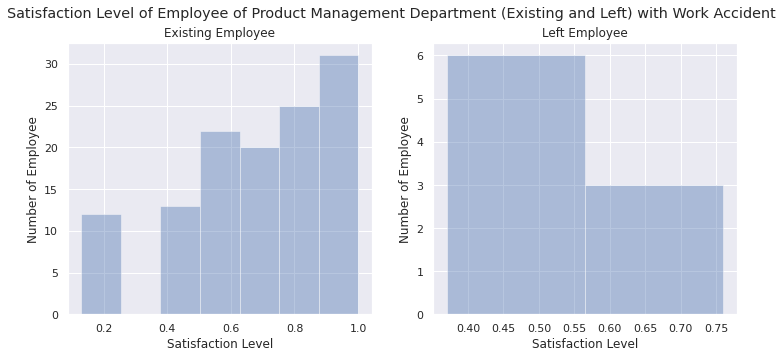

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=False)
plt.suptitle('Satisfaction Level of Employee of Product Management Department (Existing and Left) with Work Accident')
df_temp = df[(df['work_accident'] == 1) & (df['left'] == 0) & (df['role'] == 'product_mng')]['satisfaction_level']

ax1=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[0])
ax1.set_xlabel('Satisfaction Level')
ax1.set_ylabel('Number of Employee')
ax1.set_title('Existing Employee')

df_temp = df[(df['work_accident'] == 1) & (df['left'] == 1) & (df['role'] == 'product_mng')]['satisfaction_level']
ax2=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[1])
ax2.set_xlabel('Satisfaction Level')
ax2.set_ylabel('Number of Employee')
ax2.set_title('Left Employee')  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Left Employee')

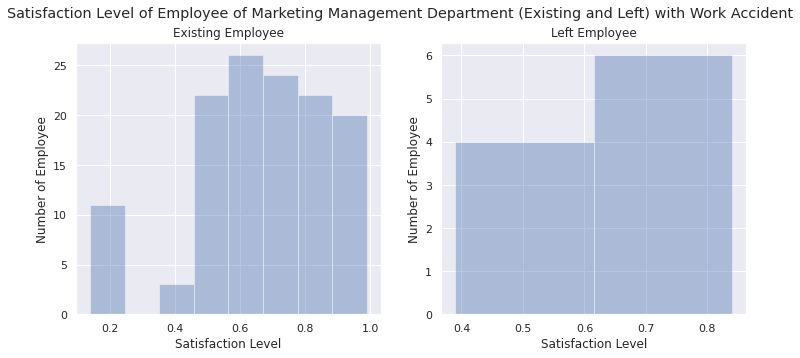

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=False)
plt.suptitle('Satisfaction Level of Employee of Marketing Management Department (Existing and Left) with Work Accident')
df_temp = df[(df['work_accident'] == 1) & (df['left'] == 0) & (df['role'] == 'marketing')]['satisfaction_level']

ax1=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[0])
ax1.set_xlabel('Satisfaction Level')
ax1.set_ylabel('Number of Employee')
ax1.set_title('Existing Employee')

df_temp = df[(df['work_accident'] == 1) & (df['left'] == 1) & (df['role'] == 'marketing')]['satisfaction_level']
ax2=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[1])
ax2.set_xlabel('Satisfaction Level')
ax2.set_ylabel('Number of Employee')
ax2.set_title('Left Employee')    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Left Employee')

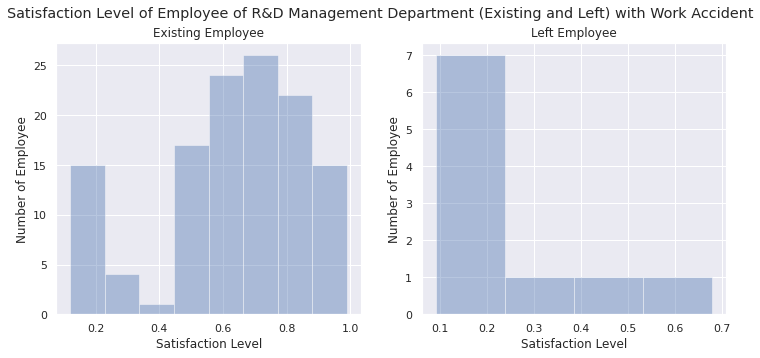

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=False)
plt.suptitle('Satisfaction Level of Employee of R&D Management Department (Existing and Left) with Work Accident')
df_temp = df[(df['work_accident'] == 1) & (df['left'] == 0) & (df['role'] == 'RandD')]['satisfaction_level']

ax1=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[0])
ax1.set_xlabel('Satisfaction Level')
ax1.set_ylabel('Number of Employee')
ax1.set_title('Existing Employee')

df_temp = df[(df['work_accident'] == 1) & (df['left'] == 1) & (df['role'] == 'RandD')]['satisfaction_level']
ax2=sns.distplot(df_temp, kde=False,norm_hist=False, ax=axes[1])
ax2.set_xlabel('Satisfaction Level')
ax2.set_ylabel('Number of Employee')
ax2.set_title('Left Employee')    

Based on the graphs, it can be seen that most of the existing employees with work accidents are with good satisfaction level to the company, except for R&D department with 10 employees left and most of them with satisfaction level >= 0.6. <br> This findings justified the previous finding on employees with work accident are still servicing the company.

<function matplotlib.pyplot.show>

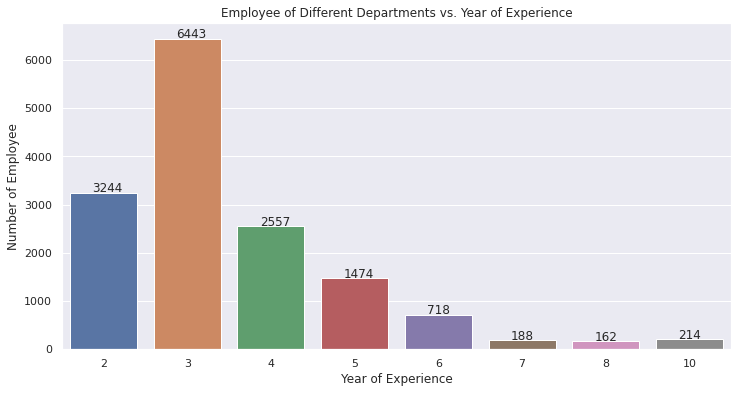

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='exp_in_company', data=df)
plt.xlabel('Year of Experience')
plt.ylabel('Number of Employee')
plt.title('Employee of Different Departments vs. Year of Experience')

for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+10
        ax.annotate(value, (x, y))

plt.show

Based on the graph, most of the employee (6443) are with 3 years of working experience in the company, followed by 2 (3244) and 4 (2557) years of experience. The number of employee is getting lesser accorss the years 5 to 10. 

<function matplotlib.pyplot.show>

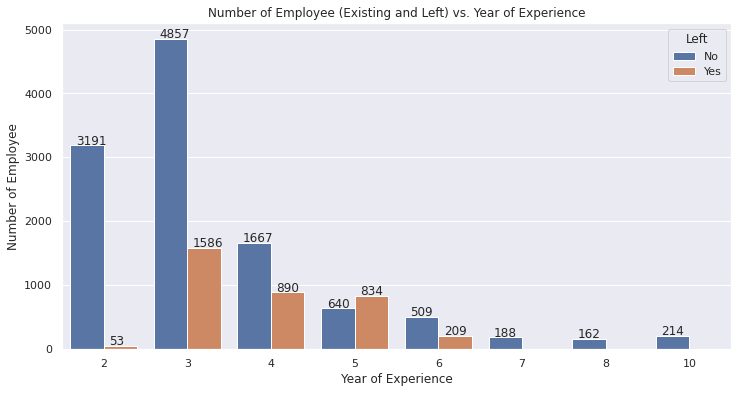

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='exp_in_company', data=df, hue='left')
plt.xlabel('Year of Experience')
plt.ylabel('Number of Employee')
plt.title('Number of Employee (Existing and Left) vs. Year of Experience')
plt.legend(title='Left', labels=['No','Yes'], loc='upper right')

for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        value = float(value)
        if(math.isnan(value)):
          value = 0
        else:          
          value = int(value)
          value = str(value)
        x = p.get_x() + p.get_width() /6
        y = p.get_y() + p.get_height()+10
        ax.annotate(value, (x, y))
plt.savefig('Emp_vs_exp.png')
plt.show

**For Existing Employee** <br>
Based on the graph, it can be seen that years 2 to 4 are with the highest number of employees. <br>

**For Left Employee** <br>
For the employees with 2 years experience, it can be seen that there are only 53 employees out of 3244 left the company. This may due to the employees would like to gain more working experience or experience the working environment before leaving. <br>
The year with the highest number of employee left is 3 and slowly decreases to year 6. <br>
For years 7 to 10, there is no employee leaving the company. <br><br>
To summarise, the longer an employee work in the company, the lesser the posibility he/she leaves the company.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


<function matplotlib.pyplot.show>

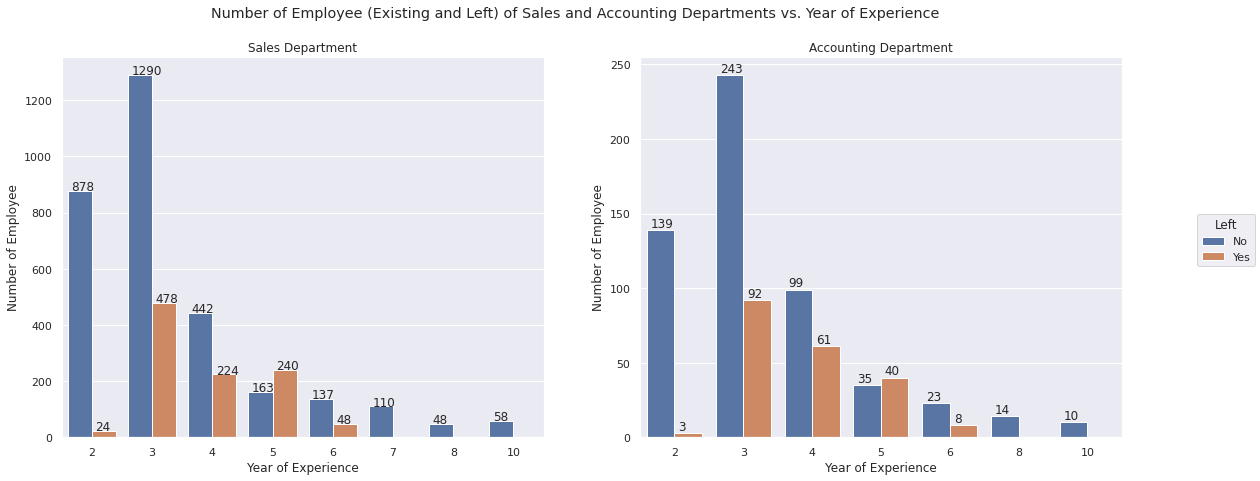

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(19,7), sharey=False)
plt.suptitle('Number of Employee (Existing and Left) of Sales and Accounting Departments vs. Year of Experience')

ax1=sns.countplot(x='exp_in_company', data=df[df['role'] =='sales'], hue='left',ax=axes[0])
ax1.set_xlabel('Year of Experience')
ax1.set_ylabel('Number of Employee')
ax1.set_title('Sales Department')
ax1.get_legend().set_visible(False)
 
for p in ax1.patches:       
        value = '{0}'.format(p.get_height())
        value = float(value)
        if(math.isnan(value)):
          value = 0
        else:          
          value = int(value)
          value = str(value)
        x = p.get_x() + p.get_width() /7
        y = p.get_y() + p.get_height()+2
        ax1.annotate(value, (x, y))

ax2=sns.countplot(x='exp_in_company', data=df[df['role'] =='accounting'], hue='left',ax=axes[1])
ax2.set_xlabel('Year of Experience')
ax2.set_ylabel('Number of Employee')
ax2.set_title('Accounting Department')
ax2.get_legend().set_visible(False)
 
for p in ax2.patches:       
        value = '{0}'.format(p.get_height())
        value = float(value)
        if(math.isnan(value)):
          value = 0
        else:          
          value = int(value)
          value = str(value)
        x = p.get_x() + p.get_width() /7
        y = p.get_y() + p.get_height()+2
        ax2.annotate(value, (x, y))
fig.legend([ax1,ax2], labels=['No','Yes'], loc='center right', title='Left')
plt.savefig('Emp_vs_exp.png')
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


<function matplotlib.pyplot.show>

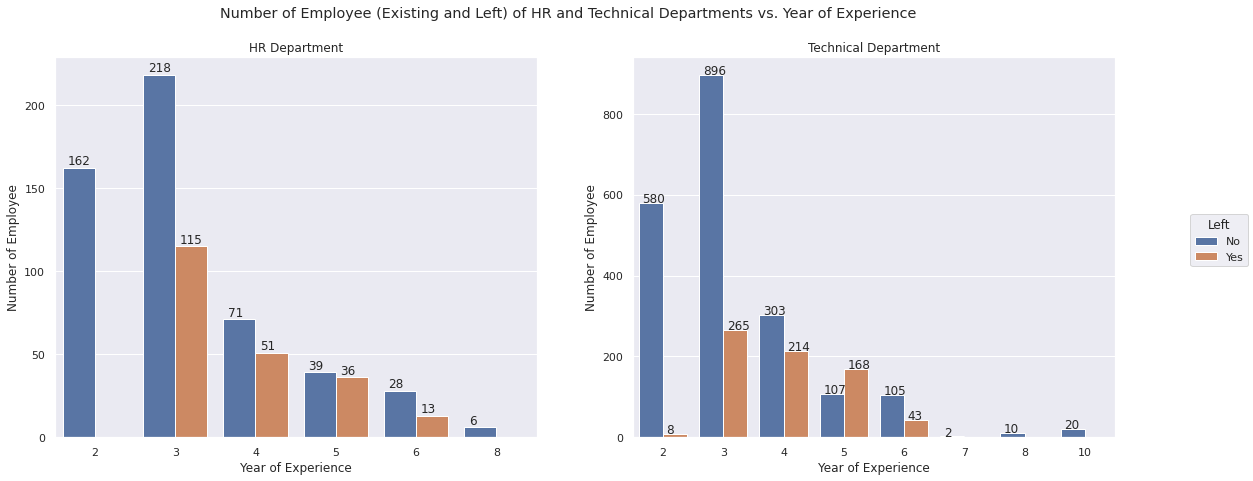

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(19,7), sharey=False)
plt.suptitle('Number of Employee (Existing and Left) of HR and Technical Departments vs. Year of Experience')

ax1=sns.countplot(x='exp_in_company', data=df[df['role'] =='hr'], hue='left',ax=axes[0])
ax1.set_xlabel('Year of Experience')
ax1.set_ylabel('Number of Employee')
ax1.set_title('HR Department')
ax1.get_legend().set_visible(False)
 
for p in ax1.patches:       
        value = '{0}'.format(p.get_height())
        value = float(value)
        if(math.isnan(value)):
          value = 0
        else:          
          value = int(value)
          value = str(value)
        x = p.get_x() + p.get_width() /7
        y = p.get_y() + p.get_height()+2
        ax1.annotate(value, (x, y))

ax2=sns.countplot(x='exp_in_company', data=df[df['role'] =='technical'], hue='left',ax=axes[1])
ax2.set_xlabel('Year of Experience')
ax2.set_ylabel('Number of Employee')
ax2.set_title('Technical Department')
ax2.get_legend().set_visible(False)
 
for p in ax2.patches:       
        value = '{0}'.format(p.get_height())
        value = float(value)
        if(math.isnan(value)):
          value = 0
        else:          
          value = int(value)
          value = str(value)
        x = p.get_x() + p.get_width() /7
        y = p.get_y() + p.get_height()+2
        ax2.annotate(value, (x, y))
fig.legend([ax1,ax2], labels=['No','Yes'], loc='center right', title='Left')
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


<function matplotlib.pyplot.show>

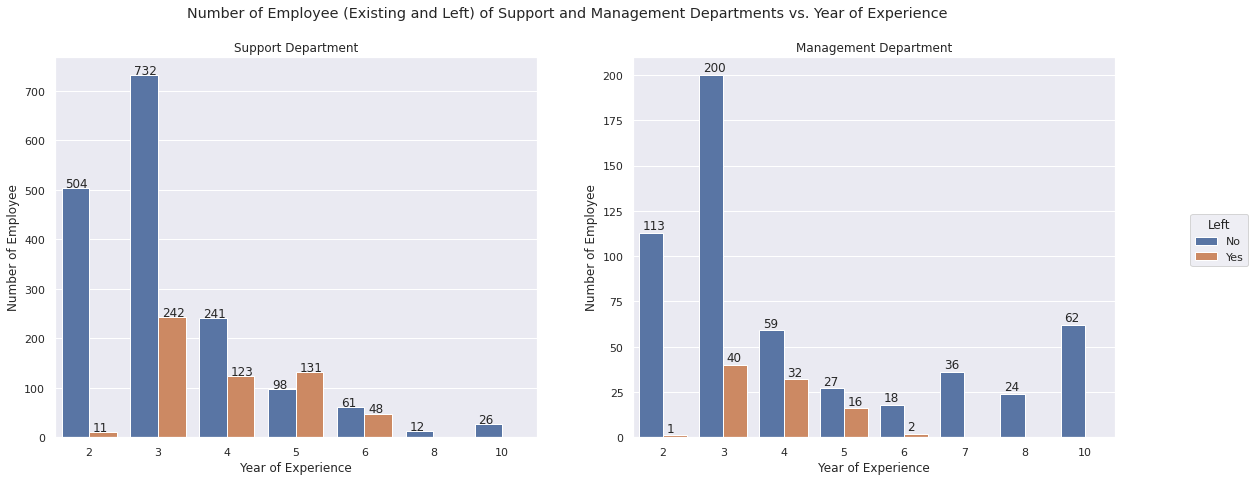

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(19,7), sharey=False)
plt.suptitle('Number of Employee (Existing and Left) of Support and Management Departments vs. Year of Experience')

ax1=sns.countplot(x='exp_in_company', data=df[df['role'] =='support'], hue='left',ax=axes[0])
ax1.set_xlabel('Year of Experience')
ax1.set_ylabel('Number of Employee')
ax1.set_title('Support Department')
ax1.get_legend().set_visible(False)
 
for p in ax1.patches:       
        value = '{0}'.format(p.get_height())
        value = float(value)
        if(math.isnan(value)):
          value = 0
        else:          
          value = int(value)
          value = str(value)
        x = p.get_x() + p.get_width() /7
        y = p.get_y() + p.get_height()+2
        ax1.annotate(value, (x, y))

ax2=sns.countplot(x='exp_in_company', data=df[df['role'] =='management'], hue='left',ax=axes[1])
ax2.set_xlabel('Year of Experience')
ax2.set_ylabel('Number of Employee')
ax2.set_title('Management Department')
ax2.get_legend().set_visible(False)
 
for p in ax2.patches:       
        value = '{0}'.format(p.get_height())
        value = float(value)
        if(math.isnan(value)):
          value = 0
        else:          
          value = int(value)
          value = str(value)
        x = p.get_x() + p.get_width() /7
        y = p.get_y() + p.get_height()+2
        ax2.annotate(value, (x, y))
fig.legend([ax1,ax2], labels=['No','Yes'], loc='center right', title='Left')
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


<function matplotlib.pyplot.show>

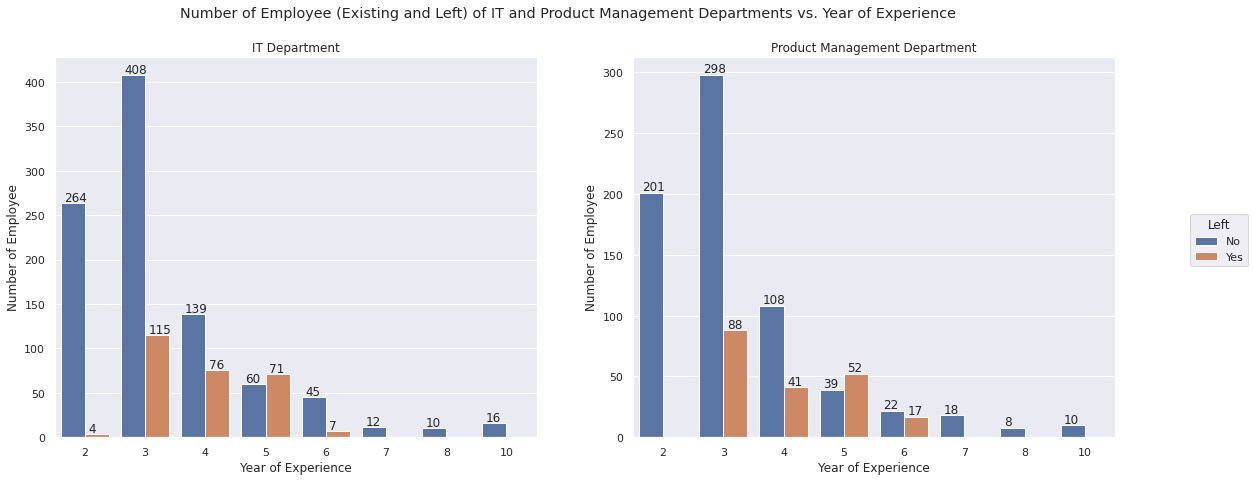

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(19,7), sharey=False)
plt.suptitle('Number of Employee (Existing and Left) of IT and Product Management Departments vs. Year of Experience')

ax1=sns.countplot(x='exp_in_company', data=df[df['role'] =='IT'], hue='left',ax=axes[0])
ax1.set_xlabel('Year of Experience')
ax1.set_ylabel('Number of Employee')
ax1.set_title('IT Department')
ax1.get_legend().set_visible(False)
 
for p in ax1.patches:       
        value = '{0}'.format(p.get_height())
        value = float(value)
        if(math.isnan(value)):
          value = 0
        else:          
          value = int(value)
          value = str(value)
        x = p.get_x() + p.get_width() /7
        y = p.get_y() + p.get_height()+2
        ax1.annotate(value, (x, y))

ax2=sns.countplot(x='exp_in_company', data=df[df['role'] =='product_mng'], hue='left',ax=axes[1])
ax2.set_xlabel('Year of Experience')
ax2.set_ylabel('Number of Employee')
ax2.set_title('Product Management Department')
ax2.get_legend().set_visible(False)
 
for p in ax2.patches:       
        value = '{0}'.format(p.get_height())
        value = float(value)
        if(math.isnan(value)):
          value = 0
        else:          
          value = int(value)
          value = str(value)
        x = p.get_x() + p.get_width() /7
        y = p.get_y() + p.get_height()+2
        ax2.annotate(value, (x, y))
fig.legend([ax1,ax2], labels=['No','Yes'], loc='center right', title='Left')
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


<function matplotlib.pyplot.show>

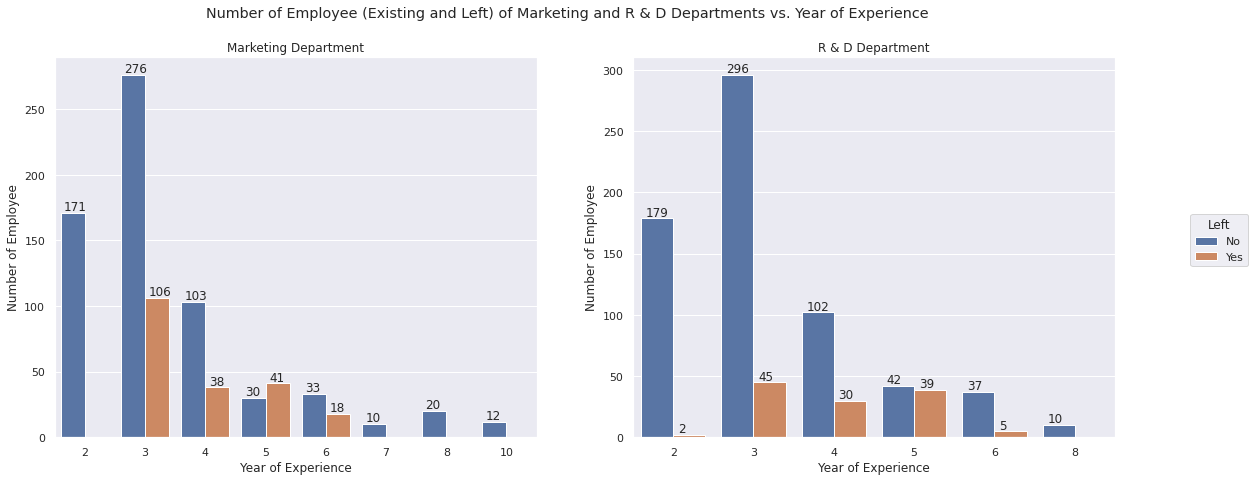

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(19,7), sharey=False)
plt.suptitle('Number of Employee (Existing and Left) of Marketing and R & D Departments vs. Year of Experience')

ax1=sns.countplot(x='exp_in_company', data=df[df['role'] =='marketing'], hue='left',ax=axes[0])
ax1.set_xlabel('Year of Experience')
ax1.set_ylabel('Number of Employee')
ax1.set_title('Marketing Department')
ax1.get_legend().set_visible(False)
 
for p in ax1.patches:       
        value = '{0}'.format(p.get_height())
        value = float(value)
        if(math.isnan(value)):
          value = 0
        else:          
          value = int(value)
          value = str(value)
        x = p.get_x() + p.get_width() /7
        y = p.get_y() + p.get_height()+2
        ax1.annotate(value, (x, y))

ax2=sns.countplot(x='exp_in_company', data=df[df['role'] =='RandD'], hue='left',ax=axes[1])
ax2.set_xlabel('Year of Experience')
ax2.set_ylabel('Number of Employee')
ax2.set_title('R & D Department')
ax2.get_legend().set_visible(False)
 
for p in ax2.patches:       
        value = '{0}'.format(p.get_height())
        value = float(value)
        if(math.isnan(value)):
          value = 0
        else:          
          value = int(value)
          value = str(value)
        x = p.get_x() + p.get_width() /7
        y = p.get_y() + p.get_height()+2
        ax2.annotate(value, (x, y))
fig.legend([ax1,ax2], labels=['No','Yes'], loc='center right', title='Left')
plt.show

Based on the 10 graphs above, it can be seen that the trends (for existing and left employees) are the same accross all the departments, i.e. highest number of employees left from year 3 of working and the number is reduces as the number of years servicing the company increases. <br> Besides, the Management department gives the highest number of employees from year 7 to 10 and none of them resigned. 

<function matplotlib.pyplot.show>

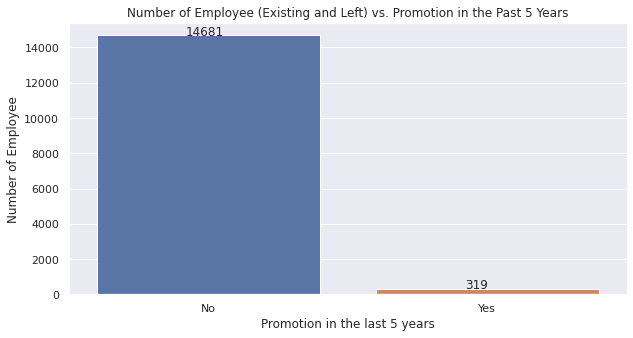

In [ ]:
ax=sns.countplot(x='promotion_last_5years', data=df)
plt.xlabel('Promotion in the last 5 years')
plt.ylabel('Number of Employee')
plt.title('Number of Employee (Existing and Left) vs. Promotion in the Past 5 Years')
plt.xticks([0,1],['No','Yes'])

for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+10
        ax.annotate(value, (x, y))

plt.show

Based on the graph, the number of employee recevied promotion in the past 5 years is very low. Only 319 of employees had promotion. 

<function matplotlib.pyplot.show>

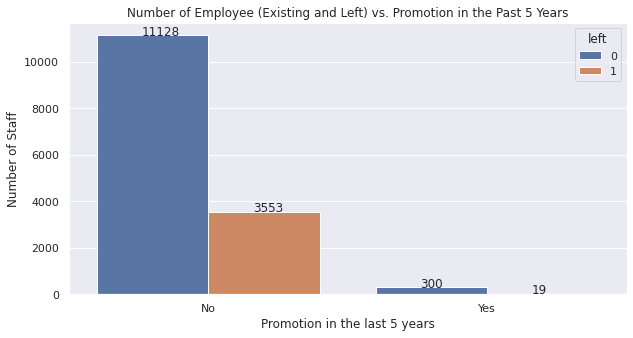

In [ ]:
ax=sns.countplot(x='promotion_last_5years', data=df, hue='left')
plt.xlabel('Promotion in the last 5 years')
plt.ylabel('Number of Staff')
plt.title('Number of Employee (Existing and Left) vs. Promotion in the Past 5 Years')
plt.xticks([0,1],['No','Yes'])

for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+10
        ax.annotate(value, (x, y))

plt.show

Based on the graph, <br>

**For Employee without Promotion** <br>
3553 (out of 14681) staff with no promotion in the past 5 years of working left the company. <br> 
**For Employee with Promotion** <br>
Out of 319 employees who received promotion, 19 of them had left the company. <br> Hence, promotion in the last 5 years may not affect the decision of a staff in leaving the company.


<function matplotlib.pyplot.show>

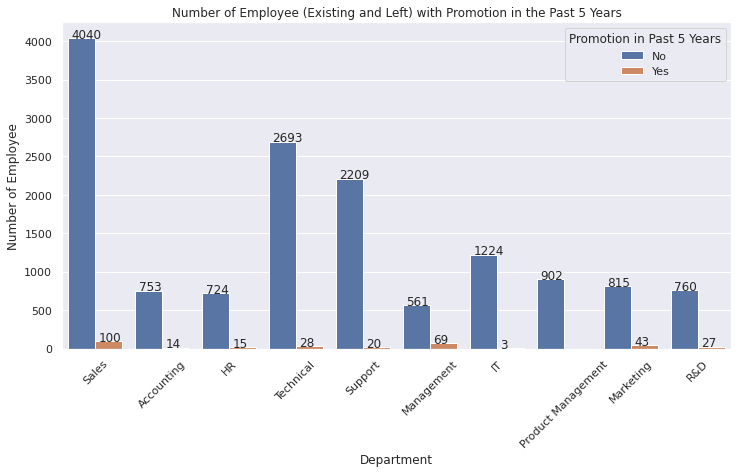

In [ ]:
plt.figure(figsize=(12,6))
df_temp = df[df['promotion_last_5years']==1]
ax=sns.countplot(x='role', data=df, hue='promotion_last_5years')
plt.xlabel('Department')
plt.ylabel('Number of Employee')
plt.title('Number of Employee (Existing and Left) with Promotion in the Past 5 Years')
plt.legend(title='Promotion in Past 5 Years', labels=['No','Yes'], loc='upper right')
labels = ['Sales','Accounting','HR','Technical','Support','Management','IT','Product Management','Marketing','R&D']
ax.set_xticklabels(labels, rotation=45)

for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        value = float(value)
        if(math.isnan(value)):
          value = 0
        else:          
          value = int(value)
          value = str(value)
        x = p.get_x() + p.get_width() /8
        y = p.get_y() + p.get_height()+1
        ax.annotate(value, (x, y))
plt.savefig('Emp_vs_promo.png')
plt.show

Based on the graph, it can be seen that the number of employees that received promotion in the past 5 years is very low. 

<function matplotlib.pyplot.show>

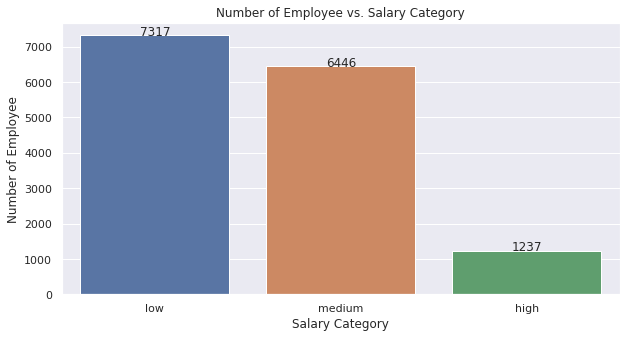

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='salary', data=df)
plt.xlabel('Salary Category')
plt.ylabel('Number of Employee')
plt.title('Number of Employee vs. Salary Category')

for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+10
        ax.annotate(value, (x, y))

plt.show

Based on the graph, 7317 employees are with low income category, followed by 6446 employees with medium and employees with high salary categories. 

<function matplotlib.pyplot.show>

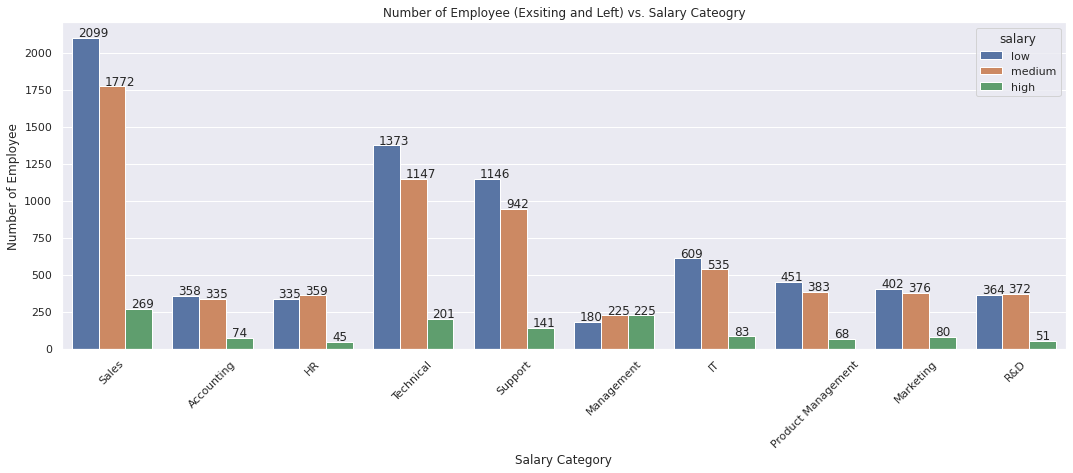

In [ ]:
plt.figure(figsize=(18,6))
ax=sns.countplot(x='role', data=df, hue='salary')
plt.xlabel('Salary Category')
plt.ylabel('Number of Employee')
plt.title('Number of Employee (Exsiting and Left) vs. Salary Cateogry')
labels = ['Sales','Accounting','HR','Technical','Support','Management','IT','Product Management','Marketing','R&D']
ax.set_xticklabels(labels, rotation=45)

for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /4.5
        y = p.get_y() + p.get_height()+10
        ax.annotate(value, (x, y))

plt.show

Based on the graph, it can be seen that employess of all the departments are with low and medium categories of salary. Except for Management department, the number of employees with low, medium and high salary categories are about the same. 

<function matplotlib.pyplot.show>

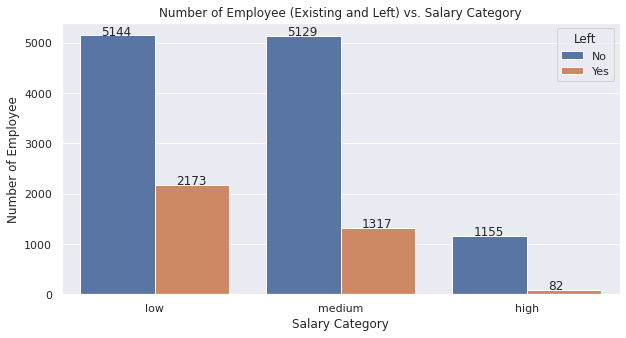

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='salary', data=df, hue='left')
plt.xlabel('Salary Category')
plt.ylabel('Number of Employee')
plt.title('Number of Employee (Existing and Left) vs. Salary Category')
plt.legend(title='Left', labels=['No','Yes'])

for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3.5
        y = p.get_y() + p.get_height()+10
        ax.annotate(value, (x, y))
plt.savefig('Emp_vs_sal.png')
plt.show

Based on the graph, it can be seen that employees with low salary are with highest number of employee left followed by medium and high salary. <br> 

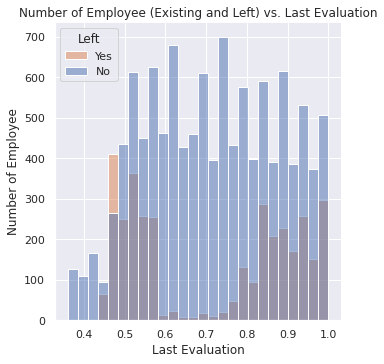

In [ ]:
ax=sns.displot(x='last_evaluation', data=df, hue='left', legend=False)
plt.legend(title='Left', labels=['Yes','No'])
plt.title('Number of Employee (Existing and Left) vs. Last Evaluation')
plt.xlabel('Last Evaluation')
plt.ylabel('Number of Employee')
plt.savefig('Emp_vs_evaluation.png')

Based on the graph, it can be seen that existing employees are mostly with at least 50% evaluation score. For the employees left, there are with evaluation score of less than 60%. <br> However, there are employees with evaluation score of 70% and above left the company. 

In [ ]:
df_temp = df[(df['last_evaluation'] >= 0.7) & (df['left'] == 1)]
df_temp.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.0,1913.000000
mean,0.464276,0.893868,5.296916,256.807109,4.571354,0.047047,1.0,0.002091
std,0.352146,0.069998,1.084638,32.005669,0.779077,0.211794,0.0,0.045691
min,0.090000,0.700000,2.000000,130.000000,2.000000,0.000000,1.0,0.000000
25%,0.100000,0.840000,5.000000,242.000000,4.000000,0.000000,1.0,0.000000
50%,0.530000,0.900000,5.000000,258.000000,5.000000,0.000000,1.0,0.000000
75%,0.820000,0.950000,6.000000,277.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


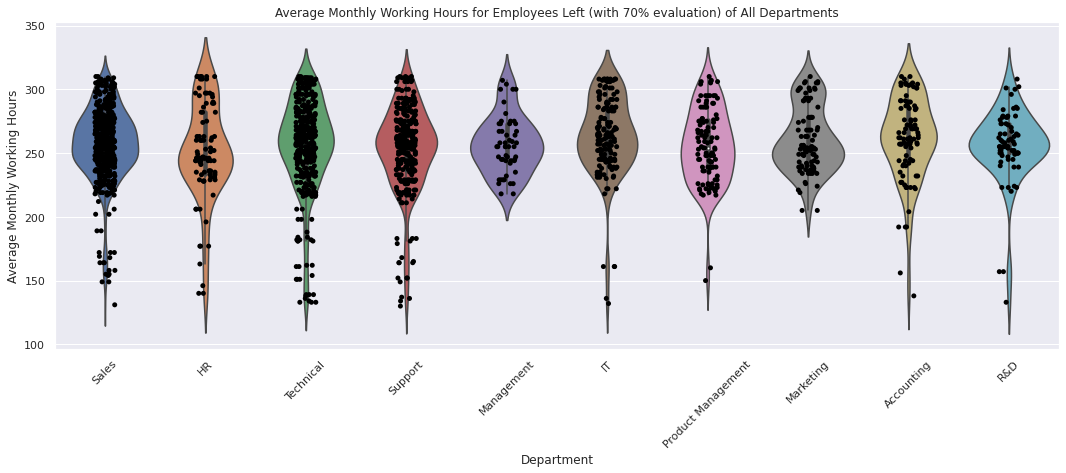

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.violinplot(x='role', y="average_monthly_hours", data=df_temp)
sns.stripplot(x='role', y="average_monthly_hours", data=df_temp, color="black", edgecolor="gray")
plt.xlabel('Department')
plt.ylabel('Average Monthly Working Hours')
plt.title('Average Monthly Working Hours for Employees Left (with 70% evaluation) of All Departments')

labels = ['Sales','HR','Technical','Support','Management','IT','Product Management','Marketing','Accounting','R&D']
ax.set_xticklabels(labels, rotation=45)
plt.savefig('Emp_vs_workHours.png')

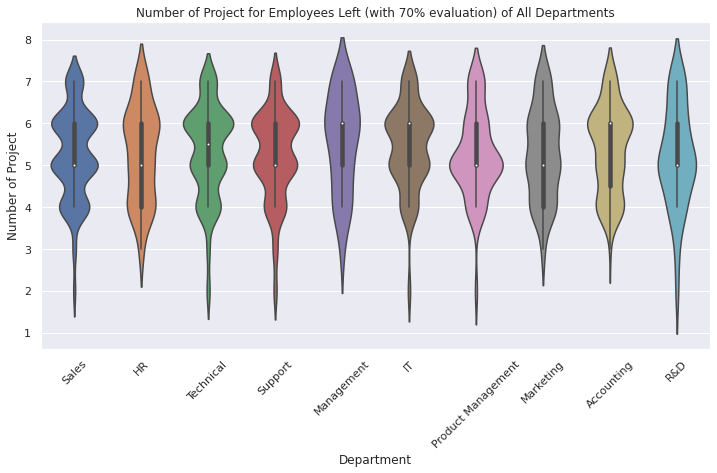

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.violinplot(x='role', y="number_project", data=df_temp)

plt.xlabel('Department')
plt.ylabel('Number of Project')
plt.title('Number of Project for Employees Left (with 70% evaluation) of All Departments')

labels = ['Sales','HR','Technical','Support','Management','IT','Product Management','Marketing','Accounting','R&D']
ax.set_xticklabels(labels, rotation=45)
plt.savefig('Emp_vs_workHours_2.png')

Based on the graphs above, employees with good evaluation left the company mainly due to most of them are assigned with 4 - 7 projects, and their average monthly working hours are more than 200 hours. <br><br> **Note**: Average monthly working hours is 184 hours (23 days x 8 hours)

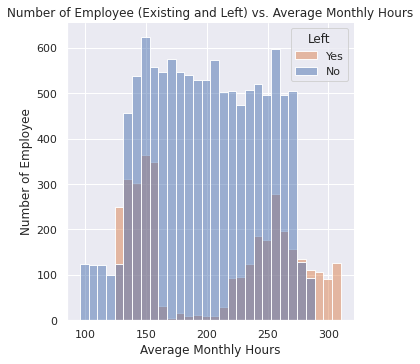

In [ ]:
ax=sns.displot(x='average_monthly_hours', data=df, hue='left', legend=False)
plt.legend(title='Left', labels=['Yes','No'])
plt.title('Number of Employee (Existing and Left) vs. Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Number of Employee')
plt.savefig('Emp_workhours_main.png')

**For Left Employee** <br> Working hours of 125 - 160, this may due to employees felt that they are under load. <br> Working hours of 200 - 300, this may due to employees felt that they are overloaded. As the normal monthly working hours is 184 hours (23 days x 8 hours per day). 

In [ ]:
df_temp = df[(df['average_monthly_hours'] < 170) & (df['left'] == 1)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Employee')

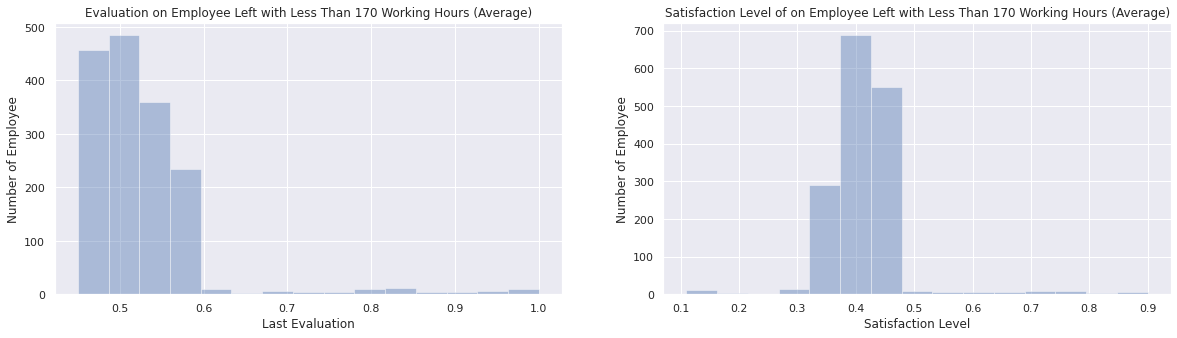

In [ ]:
fig, ax = plt.subplots(1,2,sharey=False, figsize=(20,5))

sns.distplot(df_temp['last_evaluation'], kde=False,norm_hist=False, ax=ax[0], bins=15)
ax[0].set_title('Evaluation on Employee Left with Less Than 170 Working Hours (Average)')
ax[0].set_ylabel('Number of Employee')
ax[0].set_xlabel('Last Evaluation')
sns.distplot(df_temp['satisfaction_level'], kde=False,norm_hist=False, ax=ax[1], bins=15)
ax[1].set_title('Satisfaction Level of on Employee Left with Less Than 170 Working Hours (Average)')
ax[1].set_xlabel('Satisfaction Level')
ax[1].set_ylabel('Number of Employee')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Employee')

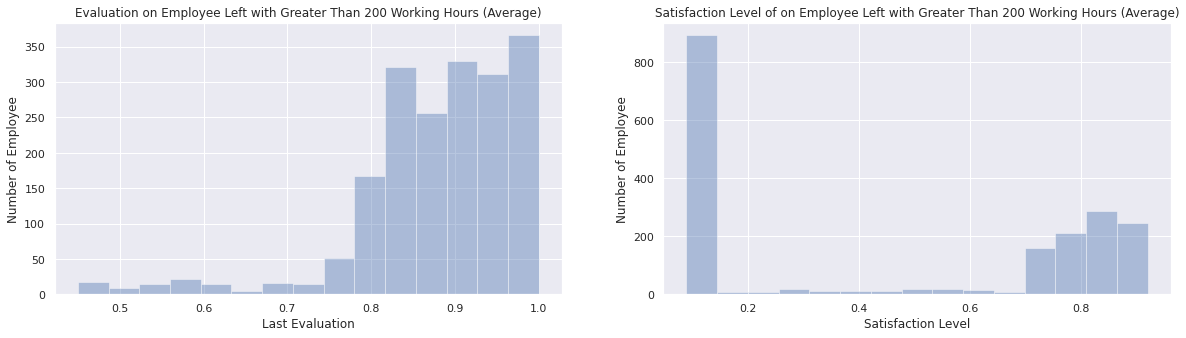

In [ ]:
df_temp = df[(df['average_monthly_hours'] >= 200) & (df['left'] == 1)]

fig, ax = plt.subplots(1,2,sharey=False, figsize=(20,5))

sns.distplot(df_temp['last_evaluation'], kde=False,norm_hist=False, ax=ax[0], bins=15)
ax[0].set_title('Evaluation on Employee Left with Greater Than 200 Working Hours (Average)')
ax[0].set_ylabel('Number of Employee')
ax[0].set_xlabel('Last Evaluation')
sns.distplot(df_temp['satisfaction_level'], kde=False,norm_hist=False, ax=ax[1], bins=15)
ax[1].set_title('Satisfaction Level of on Employee Left with Greater Than 200 Working Hours (Average)')
ax[1].set_xlabel('Satisfaction Level')
ax[1].set_ylabel('Number of Employee')

Based on the graph, <br>
**Employees with less than 170 working hours** <br>
It can be seen that they are with less than 60% evaluation score. Besides, their satisfaction level towards the company are also low (30% - 50%) <br> <br>
**Employees with more than 200 working hours** <br>
It can be seen that most of them are with at least 75% of evaluation score. Besides, their satisfaction level towards the company are either good (at leasst 70%) or bad (less than 20%) <br> <br>

# **Data Modelling** <br>
Now let's proceed to modelling part. Before modelling, the name column in the dataframe has to be removed as it does not help in training the prediction model.

In [ ]:
df_clean = df.drop('names', axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15000 non-null  float64
 2   number_project         15000 non-null  int64  
 3   average_monthly_hours  15000 non-null  int64  
 4   exp_in_company         15000 non-null  int64  
 5   work_accident          15000 non-null  int64  
 6   left                   15000 non-null  int64  
 7   promotion_last_5years  15000 non-null  int64  
 8   role                   15000 non-null  object 
 9   salary                 15000 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Based on the above, non numeric features (role and salary) have to be converted to numeric. LabelEncoder from sklearn.preprocessing will be use to convert the string values to numeric.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_clean['role'] = le.fit_transform(df_clean['role'])
df_clean['salary'] = le.fit_transform(df_clean['salary'])

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15000 non-null  float64
 2   number_project         15000 non-null  int64  
 3   average_monthly_hours  15000 non-null  int64  
 4   exp_in_company         15000 non-null  int64  
 5   work_accident          15000 non-null  int64  
 6   left                   15000 non-null  int64  
 7   promotion_last_5years  15000 non-null  int64  
 8   role                   15000 non-null  int64  
 9   salary                 15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

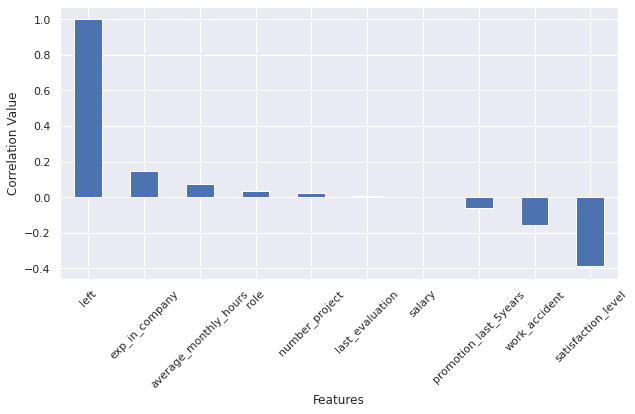

In [ ]:
df_clean.corr()['left'].sort_values(ascending = False).plot(kind='bar')
plt.ylabel('Correlation Value')
plt.xlabel('Features')
plt.xticks(rotation=45)

Based on the graph, experience in company, average monthly hours, role number of project and last evaluation are positively correlated with the left feature. While the promotion in last 5 years, work accident and satisfaction level are negatively correlated with the left feature. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
model_name = ['LogisticRegression', 'RandomForestClassifier', 'SVC', 'KNeighborsClassifier']
ac_score = []

In [ ]:
scaler = MinMaxScaler()
df_clean[['average_monthly_hours']] = scaler.fit_transform(df_clean[['average_monthly_hours']])

In [ ]:
df_clean.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role,salary
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.612847,0.716115,3.803133,0.490899,3.498333,0.144600,0.238133,0.021267,5.870733,1.347267
std,0.248628,0.171171,1.232590,0.233374,1.460139,0.351709,0.425955,0.144277,2.868804,0.625805
min,0.090000,0.360000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,0.280374,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.640000,0.720000,4.000000,0.485981,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.870000,5.000000,0.696262,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,1.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [ ]:
# Let's use all the features (except for left) to train the model. 
Y = df_clean['left']
x = df_clean.drop('left', axis=1)

X_test, X_train, y_test, y_train = train_test_split(x, Y, test_size= 0.2, random_state = 0)

In [ ]:
le_model = LogisticRegression()
le_model.fit(X_train, y_train)
y_predict = le_model.predict(X_test)
print ('Accuracy Score for Logistic Regression is {0:.2f}%\n'.format(accuracy_score(y_test, y_predict)*100))
print ('Classification Report for Logistic Regression\n'+classification_report(y_test,y_predict))
print ('Confusion Matrix for Logistic Regression\n')
print (confusion_matrix(y_test,y_predict))
ac_score.append(accuracy_score(y_test, y_predict)*100)

Accuracy Score for Logistic Regression is 76.30%

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      9142
           1       0.50      0.25      0.34      2858

    accuracy                           0.76     12000
   macro avg       0.65      0.59      0.60     12000
weighted avg       0.73      0.76      0.73     12000

Confusion Matrix for Logistic Regression

[[8437  705]
 [2139  719]]


In [ ]:
rf = RandomForestClassifier(n_estimators=30)
rf_model = rf.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)
print ('Accuracy Score for Random Forest Classifier is {0:.2f}%\n'.format(accuracy_score(y_test, y_predict)*100))
print ('Classification Report for Random Forest Classifier\n'+classification_report(y_test,y_predict))
print ('Confusion Matrix for Random Forest Classifier\n')
print (confusion_matrix(y_test,y_predict))
ac_score.append(accuracy_score(y_test, y_predict)*100)

Accuracy Score for Random Forest Classifier is 98.08%

Classification Report for Random Forest Classifier
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9142
           1       0.99      0.93      0.96      2858

    accuracy                           0.98     12000
   macro avg       0.98      0.96      0.97     12000
weighted avg       0.98      0.98      0.98     12000

Confusion Matrix for Random Forest Classifier

[[9104   38]
 [ 193 2665]]


In [ ]:
svc = SVC()
svc_model = rf.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)
print ('Accuracy Score for SVC is {0:.2f}%\n'.format(accuracy_score(y_test, y_predict)*100))
print ('Classification Report for SVC\n'+classification_report(y_test,y_predict))
print ('Confusion Matrix for SVC\n')
print (confusion_matrix(y_test,y_predict))
ac_score.append(accuracy_score(y_test, y_predict)*100)

Accuracy Score for SVC is 97.96%

Classification Report for SVC
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9142
           1       0.98      0.93      0.96      2858

    accuracy                           0.98     12000
   macro avg       0.98      0.96      0.97     12000
weighted avg       0.98      0.98      0.98     12000

Confusion Matrix for SVC

[[9092   50]
 [ 195 2663]]


In [ ]:
print ('Accuracy score for KNeighborClassifier')
knLs = []
for i in range (1,10):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print ('For {0} neighbors is {1:.2f}%'.format(i, accuracy_score(y_test, y_predict)*100))
    knLs.append(accuracy_score(y_test, y_predict)*100)
ac_score.append(max(knLs))

Accuracy score for KNeighborClassifier
For 1 neighbors is 93.36%
For 2 neighbors is 93.92%
For 3 neighbors is 92.53%
For 4 neighbors is 93.29%
For 5 neighbors is 92.27%
For 6 neighbors is 92.87%
For 7 neighbors is 91.96%
For 8 neighbors is 92.12%
For 9 neighbors is 91.75%


In [ ]:
models_result = []
for i in range(4):
  lst = [model_name[i], ac_score[i]]
  models_result.append(lst)
df_result = pd.DataFrame(models_result, columns=['Model', 'Accuracy Score'])
df_result

,Model,Accuracy Score
0,LogisticRegression,76.300000
1,RandomForestClassifier,98.075000
2,SVC,97.958333
3,KNeighborsClassifier,93.916667


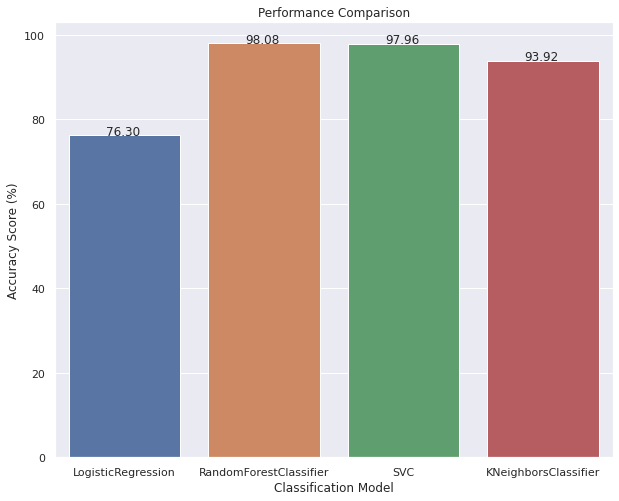

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='Model', y='Accuracy Score',data=df_result)
plt.ylabel('Accuracy Score (%)')
plt.xlabel('Classification Model')
plt.title('Performance Comparison')
for p in ax.patches:       
        value = '{0:.2f}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+0
        ax.annotate(value, (x, y))
plt.savefig('model_performance.png')
plt.show()

Based on the prediction, the KNeighborClassifier gives the best result (95.90%) accuracy, followed by SVC classifier (89.39%) and Logistic Regression (77.13%). <br> Let's try to have dummies function to convert the string to numerical values. 